In [1]:
from pymongo import MongoClient
from shapely.geometry import mapping, shape
import geopandas as gpd

Read data from the existing geojson files

In [2]:
data = gpd.read_file('search_ctx.geojson')
data.head()

,id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,image_url,label_url,browse_url,geometry
0,P16_007361_1800_XN_00S000W,MRO,CTX,EDR,MARS,True,5.34,0.0198,0,359.82,...,43.91,34.81,2008-02-21T00:58:55.696999,2008-07-17T04:09:49,2008-02-21T00:58:48.971001,2008-02-21T00:59:02.424000,https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None,"POLYGON ((0.18000 0.40520, 0.27000 -0.30640, -..."


Renames id column to comply with MongoDB Rules

In [3]:
data = data.rename(columns={'id':'_id'})
data.head()

,_id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,image_url,label_url,browse_url,geometry
0,P16_007361_1800_XN_00S000W,MRO,CTX,EDR,MARS,True,5.34,0.0198,0,359.82,...,43.91,34.81,2008-02-21T00:58:55.696999,2008-07-17T04:09:49,2008-02-21T00:58:48.971001,2008-02-21T00:59:02.424000,https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None,"POLYGON ((0.18000 0.40520, 0.27000 -0.30640, -..."


Maps geometry data to JSON objects

In [4]:
data['geometry'] = data['geometry'].apply(lambda x:mapping(x))
data['geometry']

/home/canyetismis/mongo_test/lib/python3.8/site-packages/geopandas-0.10.2-py3.8.egg/geopandas/geodataframe.py:1350: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


0    {'type': 'Polygon', 'coordinates': (((0.18, 0....
Name: geometry, dtype: object

initiates a new DB connection

In [5]:
client = MongoClient()
db = client["mongo_test"]
collection = db["geodata"]

Converts data to a dictionary and inserts records to the DB

In [6]:
data = data.to_dict(orient='records')
collection.insert_many(data)

Runs a query within the database

In [7]:
coordinates = collection.find({})
coordinates

Extracts the polygon from query

In [8]:
for x in coordinates:
    poly = x['geometry']
poly

{'type': 'Polygon',
 'coordinates': [[[0.18, 0.4052],
   [0.27, -0.3064],
   [-0.18, -0.3657],
   [-0.26, 0.3558],
   [0.18, 0.4052]]]}

Reshapes the polygon

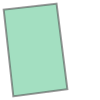

In [9]:
shape(poly)

In [12]:
data = gpd.read_file('./data/mars_mro_hirise_dtm_c0a/mars_mro_hirise_dtm_c0a.shp')
data

,CenterLat,CenterLon,MaxLat,MinLat,EastLon,WestLon,EmAngle,InAngle,PhAngle,SolLong,...,ExtURL,Ext2URL,Ext3URL,ProdURL,FilesURL,LabelURL,PILOTURL,ODEId,SubSiteTag,geometry
0,-23.8491,326.7864,-23.6927,-24.0054,326.8540,326.7190,-1.0,-1.0,-1.0,-1.0,...,https://www.uahirise.org/ESP_011265_1560,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://hirise.lpl.arizona.edu/PDS/DTM/ESP/ORB...,None,26730993,None,"POLYGON ((-33.28100 -23.70300, -33.18600 -23.6..."
1,6.1958,254.6485,6.3758,6.0152,254.7150,254.5820,-1.0,-1.0,-1.0,-1.0,...,https://www.uahirise.org/ESP_011373_1865,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://hirise.lpl.arizona.edu/PDS/DTM/ESP/ORB...,None,26730997,None,"POLYGON ((-105.41800 6.36530, -105.32900 6.375..."
2,-4.4415,137.6115,-4.2557,-4.6272,137.6770,137.5450,-1.0,-1.0,-1.0,-1.0,...,https://www.uahirise.org/ESP_011417_1755,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://hirise.lpl.arizona.edu/PDS/DTM/ESP/ORB...,None,26731000,None,"POLYGON ((137.54500 -4.26680, 137.63300 -4.255..."
3,-15.7616,96.8563,-15.6492,-15.8739,96.9141,96.7983,-1.0,-1.0,-1.0,-1.0,...,https://www.uahirise.org/ESP_011458_1640,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://hirise.lpl.arizona.edu/PDS/DTM/ESP/ORB...,None,26731004,None,"POLYGON ((96.79830 -15.65970, 96.88800 -15.649..."
4,-17.7006,200.0079,-17.5035,-17.8982,200.0770,199.9390,-1.0,-1.0,-1.0,-1.0,...,https://www.uahirise.org/ESP_011507_1620,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://hirise.lpl.arizona.edu/PDS/DTM/ESP/ORB...,None,26731008,None,"POLYGON ((-160.06100 -17.51330, -159.97200 -17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,-5.3557,137.1423,-5.2162,-5.4952,137.2019,137.0853,-1.0,-1.0,-1.0,-1.0,...,https://www.uahirise.org/ESP_017931_1745,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://hirise.lpl.arizona.edu/PDS/DTM/ESP/ORB...,None,32949867,None,"POLYGON ((137.08530 -5.23540, 137.16910 -5.216..."
854,-5.4799,137.3149,-5.3886,-5.5711,137.3643,137.2675,-1.0,-1.0,-1.0,-1.0,...,https://www.uahirise.org/ESP_063319_1745,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://hirise.lpl.arizona.edu/PDS/DTM/ESP/ORB...,None,32950818,None,"POLYGON ((137.26750 -5.39770, 137.34310 -5.388..."
855,39.9861,202.6024,40.0956,39.8758,202.6752,202.5293,-1.0,-1.0,-1.0,-1.0,...,https://www.uahirise.org/ESP_038143_2205,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://hirise.lpl.arizona.edu/PDS/DTM/ESP/ORB...,None,33174008,None,"POLYGON ((-157.47070 40.08840, -157.35550 40.0..."
856,54.5574,305.8922,54.6193,54.4892,305.9849,305.7993,-1.0,-1.0,-1.0,-1.0,...,https://www.uahirise.org/ESP_069895_2350,None,None,https://ode.rsl.wustl.edu/mars/indexproductpag...,https://ode.rsl.wustl.edu/mars/productfiles.as...,https://hirise.lpl.arizona.edu/PDS/DTM/ESP/ORB...,None,33174277,None,"POLYGON ((-54.20070 54.61330, -54.04470 54.619..."
